### Libraries

In [1]:
import pandas as pd
import numpy as np
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Options & Data

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("/home/b4/Documents/VisualCodeStudio/spotify_project/data/tracks_dataframe.csv", index_col=0)

### Functions

In [6]:
# Search song name in dataframe
def search_song(song, dataframe):
  nfkd_form = unicodedata.normalize('NFKD', song)
  only_ascii = nfkd_form.encode('ASCII', 'ignore')
  search = only_ascii.decode()
  return dataframe[dataframe['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.contains(search, case=False)]


In [7]:
# Return 6 recommended songs based on features' similarity
## Function update: Search for song name or spotify's song ID
def recomended(song):    

  try:
    try:
      song_index = df[df['id']==song].index[0]
    except:
      song_index = df[df['name'].str.contains(song, case=False)].index[0]
    index_dist = list(zip(indices[song_index], distancias[song_index]))
    print(f"\nSearch Song: {df.iloc[song_index]['name']} - {df.iloc[song_index]['artist_name']}")
    for x, y in index_dist[1:]:
      print(f"""
            Distance: {round(y, 2)}
            Track: {df.iloc[x]['track_number']}
            Name: {df.iloc[x]['name']}
            Album: {df.iloc[x]['album_name']}
            Artist: {df.iloc[x]['artist_name']}
            Key: {df.iloc[x]['key']}
            """)
  except:
    print('Hmm.. Song not on the list.')


## Code

In [8]:
df

,track_number,name,id,duration_min,track_pop,album_name,album_pop,artist_name,artist_pop,artists_feat,href,external_urls,uri,analysis_url,preview_url,explicit,disc_number,available_markets,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,Eu Clamo a Ti,4uMRplrFfmcqQ9DzEd8Nkb,05:20,26,Lado Único,26,Paulo Cesar Baruk,54,"('Paulo Cesar Baruk', 'Sync 3')",https://api.spotify.com/v1/tracks/4uMRplrFfmcq...,{'spotify': 'https://open.spotify.com/track/4u...,spotify:track:4uMRplrFfmcqQ9DzEd8Nkb,https://api.spotify.com/v1/audio-analysis/4uMR...,https://p.scdn.co/mp3-preview/8cfd3dfd3c9efeac...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",320373,0.385,0.616,10.0,-7.426,1.0,0.0419,0.233,0.000000,0.0812,0.138,129.542,4.0
1,2,Toma o Teu Lugar - Ao Vivo,0UWEBWQS26nsiFsCIdu91t,05:03,26,Lado Único,26,Paulo Cesar Baruk,54,"('Paulo Cesar Baruk',)",https://api.spotify.com/v1/tracks/0UWEBWQS26ns...,{'spotify': 'https://open.spotify.com/track/0U...,spotify:track:0UWEBWQS26nsiFsCIdu91t,https://api.spotify.com/v1/audio-analysis/0UWE...,https://p.scdn.co/mp3-preview/6c9ca36e01408e30...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",303613,0.503,0.707,0.0,-6.919,1.0,0.0329,0.569,0.000004,0.9350,0.145,125.898,4.0
2,3,Não Há Outro - Ao Vivo,0TrqJmSgH8iRoWKVNgfz90,05:05,26,Lado Único,26,Paulo Cesar Baruk,54,"('Paulo Cesar Baruk',)",https://api.spotify.com/v1/tracks/0TrqJmSgH8iR...,{'spotify': 'https://open.spotify.com/track/0T...,spotify:track:0TrqJmSgH8iRoWKVNgfz90,https://api.spotify.com/v1/audio-analysis/0Trq...,https://p.scdn.co/mp3-preview/f4139dd69b0f02b2...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",305552,0.523,0.875,1.0,-6.368,0.0,0.0435,0.130,0.008760,0.1590,0.233,110.183,4.0
3,4,Jesus Te Amamos - Ao Vivo,7eQd7qn3rpYF7dSekqsYpl,07:00,27,Lado Único,26,Paulo Cesar Baruk,54,"('Paulo Cesar Baruk',)",https://api.spotify.com/v1/tracks/7eQd7qn3rpYF...,{'spotify': 'https://open.spotify.com/track/7e...,spotify:track:7eQd7qn3rpYF7dSekqsYpl,https://api.spotify.com/v1/audio-analysis/7eQd...,https://p.scdn.co/mp3-preview/3c122a408a046e37...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",420160,0.272,0.555,10.0,-8.430,1.0,0.0426,0.688,0.000053,0.6990,0.259,126.801,3.0
4,5,Rei Do Meu Coração,5cZs85L9QLOR48fD6afO6A,03:12,29,Lado Único,26,Paulo Cesar Baruk,54,"('Paulo Cesar Baruk',)",https://api.spotify.com/v1/tracks/5cZs85L9QLOR...,{'spotify': 'https://open.spotify.com/track/5c...,spotify:track:5cZs85L9QLOR48fD6afO6A,https://api.spotify.com/v1/audio-analysis/5cZs...,https://p.scdn.co/mp3-preview/6378492fc49a5677...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",192066,0.358,0.581,0.0,-9.066,1.0,0.0481,0.339,0.000122,0.9460,0.295,131.116,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,1,Exaltação,0am7BF0s2CocRwmQiFxDUM,04:09,4,Gratidão,6,Vencedores por Cristo,37,"('Vencedores por Cristo',)",https://api.spotify.com/v1/tracks/0am7BF0s2Coc...,{'spotify': 'https://open.spotify.com/track/0a...,spotify:track:0am7BF0s2CocRwmQiFxDUM,https://api.spotify.com/v1/audio-analysis/0am7...,https://p.scdn.co/mp3-preview/5342876d11ae5789...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",249515,0.534,0.528,7.0,-11.340,1.0,0.0273,0.242,0.000003,0.1010,0.385,96.043,4.0
3765,2,Salmo 16,75Wmi9u4FALXiemOF0FAlt,03:51,10,Gratidão,6,Vencedores por Cristo,37,"('Vencedores por Cristo',)",https://api.spotify.com/v1/tracks/75Wmi9u4FALX...,{'spotify': 'https://open.spotify.com/track/75...,spotify:track:75Wmi9u4FALXiemOF0FAlt,https://api.spotify.com/v1/audio-analysis/75Wm...,https://p.scdn.co/mp3-preview/cacf9b54e394018d...,False,1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",231611,0.598,0.482,0.0,-10.563,0.0,0.0317,0.195,0.000000,0.2020,0.574,128.142,4.0
3766,3,Ame ao Senhor,2KfADxudeFqdpeCLh2o1cZ,04:36,11,Gratidão,6,Vencedores por C

In [19]:
for i in zip(df['name'], df['artist_name'], df['id']):
    print(f"{i[0]}, {i[1]} - {i[2]}")

Eu Clamo a Ti, Paulo Cesar Baruk - 4uMRplrFfmcqQ9DzEd8Nkb
Toma o Teu Lugar - Ao Vivo, Paulo Cesar Baruk - 0UWEBWQS26nsiFsCIdu91t
Não Há Outro - Ao Vivo, Paulo Cesar Baruk - 0TrqJmSgH8iRoWKVNgfz90
Jesus Te Amamos - Ao Vivo, Paulo Cesar Baruk - 7eQd7qn3rpYF7dSekqsYpl
Rei Do Meu Coração, Paulo Cesar Baruk - 5cZs85L9QLOR48fD6afO6A
Seria Tão Bom, Paulo Cesar Baruk - 6Lc0MaXCwPwQTEPUJG1Md0
Pode Isso, Arnaldo? - Ao Vivo, Paulo Cesar Baruk - 5DGHY4x2DtUf4HBq09SW8T
Reggae Fé, Paulo Cesar Baruk - 3jQIVrI2dtt80m6Q72q8t7
Quebrantado - Ao Vivo, Paulo Cesar Baruk - 2ebSiCnkzAw8REJ7msDHKP
Sonda-me / Estrela da Manhã - Ao Vivo, Paulo Cesar Baruk - 3EgytSNtEGJeWf63mJLz5c
Todo Som - Ao Vivo, Paulo Cesar Baruk - 0piTjo5R0jrqBY8c89p2vL
Deus, Somente Deus - Ao Vivo, Paulo Cesar Baruk - 6VDEukwrTV0r9NXdhKPR93
Deixa Tudo - Ao Vivo, Paulo Cesar Baruk - 53pYr3kjnf65SRi5ZA0Cf0
Não Tenhas Sobre Ti - Ao Vivo, Paulo Cesar Baruk - 3Zqi5XYJiue0vJZWhyfYLD
Calmo, Sereno e Tranquilo - Ao Vivo, Paulo Cesar Baruk - 6MQt

### Model

In [7]:
features = df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
               'track_pop', 'album_pop', 'artist_pop']]

<AxesSubplot:>

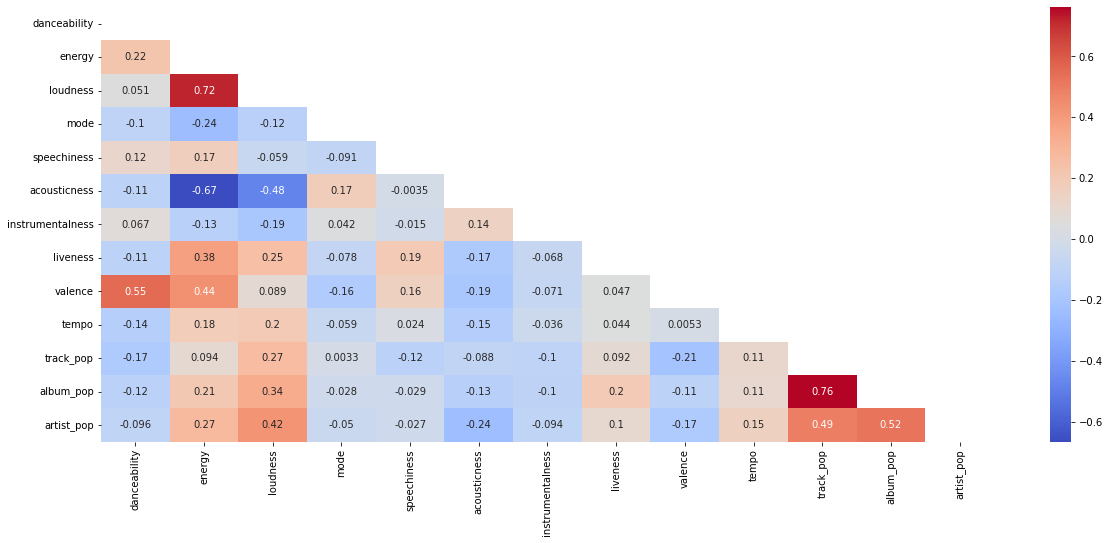

In [8]:
corr = features.corr()
matrix = np.triu(corr)
plt.subplots(figsize=(20,8))
sns.heatmap(features.corr(), annot=True, mask=matrix, cmap='coolwarm')

In [9]:
std = StandardScaler()

In [10]:
features_std = std.fit_transform(features)
features_std_df = pd.DataFrame(features_std, columns=features.columns)

In [11]:
features_std_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_pop,album_pop,artist_pop
0,-0.671127,0.208812,0.337158,0.517481,-0.143640,-0.509542,-0.124050,-1.017858,-1.084402,0.223452,0.540855,0.029688,0.211417
1,0.184779,0.643960,0.499343,0.517481,-0.269911,0.680081,-0.123999,1.687093,-1.050886,0.088715,0.619244,0.029688,0.211417
2,0.329847,1.447310,0.675602,-1.932440,-0.121191,-0.874217,-0.024196,-0.771378,-0.629549,-0.492347,0.540855,0.029688,0.211417
3,-1.490765,-0.082881,0.015988,0.517481,-0.133818,1.101406,-0.123443,0.939414,-0.505063,0.122104,0.619244,0.029688,0.211417
4,-0.866969,0.041447,-0.187463,0.517481,-0.056652,-0.134244,-0.122659,1.721942,-0.332697,0.281651,0.854411,0.029688,0.211417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.474916,0.730033,0.755575,0.517481,-0.286747,0.209189,-0.115352,-1.063796,0.577008,-0.316013,-1.026927,-2.092099,-1.163681
2865,0.707026,0.433559,0.539009,0.517481,-0.389168,-1.306836,0.286307,-0.771378,-0.485911,-1.423747,-0.713371,-1.940543,-1.163681
2866,-0.011064,0.290103,1.107775,0.517481,-0.303584,0.524297,-0.124050,-0.834740,-0.184272,0.756854,-0.948538,-2.016321,-1.163681
2867,1.512157,1.189091,0.388341,-1.932440,0.045768,-1.011945,-0.124050,-0.882262,0.787677,-0.350769,-1.026927,-2.092099,-1.163681


In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(features_std_df) 
visualizer.show()

NameError: name 'KElbowVisualizer' is not defined

In [ ]:
for i in range(2,12):
  model = KMeans(n_clusters=i, random_state=42)
  yellow_visualizer = SilhouetteVisualizer(model)
  yellow_visualizer.fit(features_std_df)
  yellow_visualizer.show()

In [13]:
model = KMeans(5)
cluster = model.fit_predict(features_std_df)

In [14]:
df['cluster'] = cluster

### Visualization

In [15]:
df.groupby(by='cluster').median()

,track_number,track_pop,album_pop,artist_pop,explicit,disc_number,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,,,,,,
0,7.0,7.0,18.0,46.0,0.0,1.0,255156.5,0.442,0.3550,5.0,-11.5335,1.0,0.03100,0.6365,0.000001,0.137,0.2580,114.1325,4.0
1,6.0,20.0,35.0,55.0,0.0,1.0,291934.5,0.465,0.7675,5.5,-5.8420,1.0,0.04300,0.1155,0.000000,0.710,0.3475,134.8880,4.0
2,6.0,28.0,38.0,57.0,0.0,1.0,313469.0,0.429,0.4960,6.0,-7.7410,1.0,0.03200,0.4880,0.000000,0.186,0.2240,132.0490,4.0
3,6.0,8.0,20.0,50.0,0.0,1.0,240239.5,0.623,0.7260,5.0,-8.0595,1.0,0.04865,0.2255,0.000000,0.233,0.6600,119.9415,4.0
4,6.0,8.0,17.0,45.0,0.0,1.0,226422.0,0.608,0.2975,5.0,-13.9275,1.0,0.04120,0.8850,0.892500,0.122,0.1635,107.1195,4.0


In [16]:
df[df['cluster']==4].describe()

,track_number,track_pop,album_pop,artist_pop,disc_number,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,5.966667,6.866667,17.366667,47.266667,1.0,224515.466667,0.555300,0.327363,5.000000,-13.815367,0.933333,0.043413,0.751150,0.831267,0.229313,0.229260,115.113500,3.966667,4.0
std,4.205771,5.544387,11.978381,6.113486,0.0,97906.848147,0.215501,0.184013,2.703765,3.353406,0.253708,0.012874,0.281356,0.146887,0.228758,0.159383,33.140939,0.319842,0.0
min,1.000000,0.000000,0.000000,38.000000,1.0,42724.000000,0.107000,0.082900,0.000000,-22.101000,0.000000,0.024800,0.000017,0.446000,0.074900,0.051600,73.690000,3.000000,4.0
25%,2.000000,1.000000,5.000000,45.000000,1.0,184949.750000,0.433000,0.255250,2.500000,-15.603750,1.000000,0.034025,0.650250,0.795500,0.112000,0.127000,95.247250,4.000000,4.0
50%,6.000000,8.000000,17.000000,45.000000,1.0,226422.000000,0.608000,0.297500,5.000000,-13.927500,1.000000,0.041200,0.885000,0.892500,0.122000,0.163500,107.119500,4.000000,4.0
75%,10.000000,10.750000,23.000000,51.500000,1.0,284634.750000,0.745000,0.345000,7.000000,-11.955000,1.000000,0.048575,0.918250,0.917000,0.237250,0.354750,120.020500,4.000000,4.0
max,12.000000,17.000000,46.000000,64.000000,1.0,508040.000000,0.786000,0.924000,10.000000,-6.965000,1.000000,0.083200,0.970000,0.957000,0.955000,0.634000,208.151000,5.000000,4.0


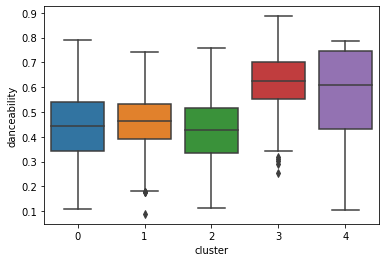

In [17]:
sns.boxplot(data=df, x='cluster', y='danceability')
plt.show()

### Recommendation

In [18]:
cluster

array([2, 1, 1, ..., 0, 3, 3], dtype=int32)

In [19]:
features_std_df['cluster'] = cluster

In [20]:
features_std_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_pop,album_pop,artist_pop,cluster
0,-0.671127,0.208812,0.337158,0.517481,-0.143640,-0.509542,-0.124050,-1.017858,-1.084402,0.223452,0.540855,0.029688,0.211417,2
1,0.184779,0.643960,0.499343,0.517481,-0.269911,0.680081,-0.123999,1.687093,-1.050886,0.088715,0.619244,0.029688,0.211417,1
2,0.329847,1.447310,0.675602,-1.932440,-0.121191,-0.874217,-0.024196,-0.771378,-0.629549,-0.492347,0.540855,0.029688,0.211417,1
3,-1.490765,-0.082881,0.015988,0.517481,-0.133818,1.101406,-0.123443,0.939414,-0.505063,0.122104,0.619244,0.029688,0.211417,2
4,-0.866969,0.041447,-0.187463,0.517481,-0.056652,-0.134244,-0.122659,1.721942,-0.332697,0.281651,0.854411,0.029688,0.211417,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.474916,0.730033,0.755575,0.517481,-0.286747,0.209189,-0.115352,-1.063796,0.577008,-0.316013,-1.026927,-2.092099,-1.163681,3
2865,0.707026,0.433559,0.539009,0.517481,-0.389168,-1.306836,0.286307,-0.771378,-0.485911,-1.423747,-0.713371,-1.940543,-1.163681,3
2866,-0.011064,0.290103,1.107775,0.517481,-0.303584,0.524297,-0.124050,-0.834740,-0.184272,0.756854,-0.948538,-2.016321,-1.163681,0
2867,1.512157,1.189091,0.388341,-1.932440,0.045768,-1.011945,-0.124050,-0.882262,0.787677,-0.350769,-1.026927,-2.092099,-1.163681,3


In [21]:
model = NearestNeighbors(n_neighbors=6)

In [22]:
model.fit(features_std_df)

NearestNeighbors(n_neighbors=6)

In [23]:
distancias, indices = model.kneighbors(features_std_df)

In [24]:
indices

array([[   0,  597,  593, 1225, 1224,  446],
       [   1,  780, 1451, 2200, 1437,  864],
       [   2,  694,  716,  679,  355,  686],
       ...,
       [2866, 1826, 2859, 1425, 1808, 1576],
       [2867, 1824, 1733, 1928, 1732, 1816],
       [2868, 1797, 1426, 1793,  827, 1613]])

In [25]:
distancias

array([[0.        , 0.70944546, 0.92929215, 1.08821988, 1.09645383,
        1.15981185],
       [0.        , 1.24616558, 1.39203605, 1.53300027, 1.55236214,
        1.5691678 ],
       [0.        , 1.37951107, 1.49447085, 1.54775268, 1.57140232,
        1.58203403],
       ...,
       [0.        , 1.69775098, 1.79955595, 1.85225167, 1.92129375,
        1.96035036],
       [0.        , 1.36819908, 1.61516148, 1.622514  , 1.83237996,
        1.88848884],
       [0.        , 1.97408649, 2.07003706, 2.20518156, 2.21409333,
        2.31898349]])

In [26]:
song_index = df[df['name']=='Andando Sobre as Águas - Ao vivo'].index[0]

In [27]:
indices[song_index]

array([1500, 1490, 1442, 1469,  767,  735])

In [28]:
distancias[song_index]

array([0.        , 1.1019672 , 1.44563698, 1.62864478, 1.65435332,
       1.86189563])

In [29]:
index_dist = list(zip(indices[song_index], distancias[song_index]))

In [30]:
index_dist

[(1500, 0.0),
 (1490, 1.1019671999808767),
 (1442, 1.4456369784330747),
 (1469, 1.6286447818136616),
 (767, 1.6543533205588872),
 (735, 1.8618956335863428)]

In [31]:
teste = list(index_dist)

In [32]:
teste

[(1500, 0.0),
 (1490, 1.1019671999808767),
 (1442, 1.4456369784330747),
 (1469, 1.6286447818136616),
 (767, 1.6543533205588872),
 (735, 1.8618956335863428)]

In [33]:
for x, y in index_dist:
  print(f"""
            Distance: {round(y, 2)}
            Track: {df.iloc[x]['track_number']}
            Name:{df.iloc[x]['name']}
            Album: {df.iloc[x]['album_name']}
            Artist: {df.iloc[x]['artist_name']}
            Key: {df.iloc[x]['key']}
        """)


            Distance: 0.0
            Track: 6
            Name:Andando Sobre as Águas - Ao vivo
            Album: Renascer Praise 16 (Andando sobre as águas)
            Artist: Renascer Praise
            Key: 2.0
        

            Distance: 1.1
            Track: 8
            Name:Novo dia, novo tempo - ao vivo
            Album: RP XVII - Novo dia, Novo Tempo
            Artist: Renascer Praise
            Key: 10.0
        

            Distance: 1.45
            Track: 1
            Name:Na Força Do Louvor - Ao Vivo
            Album: Betel - Renascer Praise XX (Ao Vivo)
            Artist: Renascer Praise
            Key: 4.0
        

            Distance: 1.63
            Track: 14
            Name:Toma A Minha Vida - Live
            Album: Daniel (Live)
            Artist: Renascer Praise
            Key: 6.0
        

            Distance: 1.65
            Track: 11
            Name:Por Ti Eu Existo - Ao Vivo
            Album: Aleluia - Diante do Trono 13 (Ao Vivo)


## Recommended

In [38]:
search_song('Jesus, Filho de Deus', df)

,track_number,name,id,duration_min,track_pop,album_name,album_pop,artist_name,artist_pop,artists_feat,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
1030,12,"Jesus, Filho de Deus",2h8LYKBX61MoTyCSeT0RBo,04:24,15,Aline Barros - Gospel Collection Ao Vivo,48,Aline Barros,62,"('Aline Barros',)",...,-4.910,1.0,0.0384,0.241,0.000000,0.873,0.281,118.071,4.0,1
1141,12,"Jesus, Filho de Deus",5B5DxhTpundeqtVCEraOmu,04:26,17,Caminho de Milagres,39,Aline Barros,62,"('Aline Barros',)",...,-3.255,1.0,0.0453,0.324,0.000000,0.954,0.301,117.988,4.0,1
2052,6,"Jesus, Filho de Deus - Acústico",1jvyxyPnSwGFp4NwTvDrEU,05:00,25,"Série Acústica Com Fernandinho, Vol. 1 (Acústico)",37,Fernandinho,64,"('Fernandinho',)",...,-10.385,1.0,0.0275,0.298,0.000001,0.126,0.244,151.844,4.0,2
2165,4,"Jesus, Filho de Deus - Ao Vivo",6XIlmfS5YcY4IMTB0OQHnv,05:11,51,Teus Sonhos (ao Vivo),54,Fernandinho,64,"('Fernandinho',)",...,-6.522,1.0,0.0299,0.343,0.000000,0.941,0.124,76.002,4.0,2


In [39]:
recomended('6XIlmfS5YcY4IMTB0OQHnv')


Search Song: Jesus, Filho de Deus - Ao Vivo - Fernandinho

            Distance: 1.57
            Track: 1
            Name: Espírito, Enche A Minha Vida / Ao Único
            Album: Ecoar
            Artist: Gabriela Rocha
            Key: 0.0
            

            Distance: 1.65
            Track: 6
            Name: Primeira Essência (Jardim Particular)
            Album: Extraordinário Amor de Deus
            Artist: Aline Barros
            Key: 1.0
            

            Distance: 1.79
            Track: 3
            Name: Deus do Impossível - Ao Vivo
            Album: Aline Barros 20 Anos Ao Vivo
            Artist: Aline Barros
            Key: 7.0
            

            Distance: 1.89
            Track: 7
            Name: Digno é o Senhor (Worthy Is The Lamb) - Ao Vivo
            Album: Aline Barros 20 Anos Ao Vivo
            Artist: Aline Barros
            Key: 7.0
            

            Distance: 2.14
            Track: 8
            Name: Recomeçar - A

In [ ]:
df[df.duplicated(subset=['id'], keep=False)].sort_values('name')
df[df.duplicated(subset=['name','duration_min'], keep=False)]
df[df.duplicated(subset=['name','duration_min'], keep=False)].sort_values(['name', 'track_pop'], ascending=False)
